In [1]:
EMCIl1<-read.csv("EMCI_mis_l1.csv")
EMCIori<-read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/DE_label/subLabel/All_QN_l1_QN.csv")
head(EMCIori)
library(dplyr)
EMCIori<-EMCIori%>%
filter(labels_refined %in% c ("EMCI1","EMCI2")) %>%
select(ID, labels_refined) %>%
arrange(ID)

EMCIl1 <- EMCIl1%>%
filter(labels_matching_EMCI != "Unmatched")%>%
arrange(X)

,...1,HMDB0000062,HMDB0000651,HMDB0006469,HMDB0002250,HMDB13330,HMDB13331,HMDB13332,HMDB0000222,HMDB00848,⋯,HMDB0000167,HMDB0000929,HMDB0002141,HMDB0000562,HMDB0000870,HMDB0000684,HMDB00725,labels_matching_UC_big,labels_refined,ID
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,11227,0.82829591,2.2612004,0.10374382,0.9869379,0.5513237,0.40254203,0.4217412,0.06415676,0.12871467,⋯,0.997543628,0.9453178,0.82829591,2.4644034,-0.052581159,1.4027156,1.4027156,LMCI,LMCI2,11227
2,11245,-0.09544307,1.9997407,0.03463932,1.4304307,0.8640256,1.10107868,0.8819317,-0.13921167,0.06415676,⋯,0.805443123,-1.4411009,0.61872600,-0.5297853,0.656711735,-1.8043125,1.1806857,LMCI,LMCI1,11245
3,90159,-0.45544939,-1.2323535,-1.25397973,-1.2205793,1.5752085,-0.32805216,-0.8351994,-1.18509822,-0.96342695,⋯,0.008196061,-1.1157608,0.07006711,1.7638228,-0.003930137,1.2611284,-0.6597572,EMCI,EMCI1,90159
4,90271,-0.34229579,0.9397382,-0.49477770,0.7252444,0.8876414,0.65671173,0.9113069,0.06056719,0.24559547,⋯,-1.489971388,1.0940684,0.56428355,0.2368558,0.291240762,0.2017683,-0.6644274,EMCI,EMCI1,90271
5,90272,-0.76765888,0.3068996,-0.79783048,0.4716787,0.6938040,0.05307374,0.1742383,0.34869981,0.97500381,⋯,0.171355205,0.7252444,-0.44524140,0.4475953,-1.201188891,0.8086264,-0.5428934,EMCI,EMCI2,90272
6,90273,0.38959406,0.5328667,0.72987185,0.5117886,0.1225903,0.45053088,0.8282959,0.88193167,1.57520850,⋯,0.808626407,1.1131656,1.69585652,0.2762527,0.567319577,0.1487766,0.2976833,EMCI,EMCI2,90273



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
labels_99  <- read.csv("99.csv")$labels_matching_UC_big
labels_995 <- read.csv("99.5.csv")$labels_matching_UC_big
labels_999 <- read.csv("999.csv")$labels_matching_UC_big

label_entropy <- function(labels) {
  p <- table(labels) / length(labels)
  -sum(p * log(p))
}

label_entropy(labels_99)
label_entropy(labels_995)
label_entropy(labels_999)


[1] 0.1322609

[1] 0.5650007

[1] 0.3198419

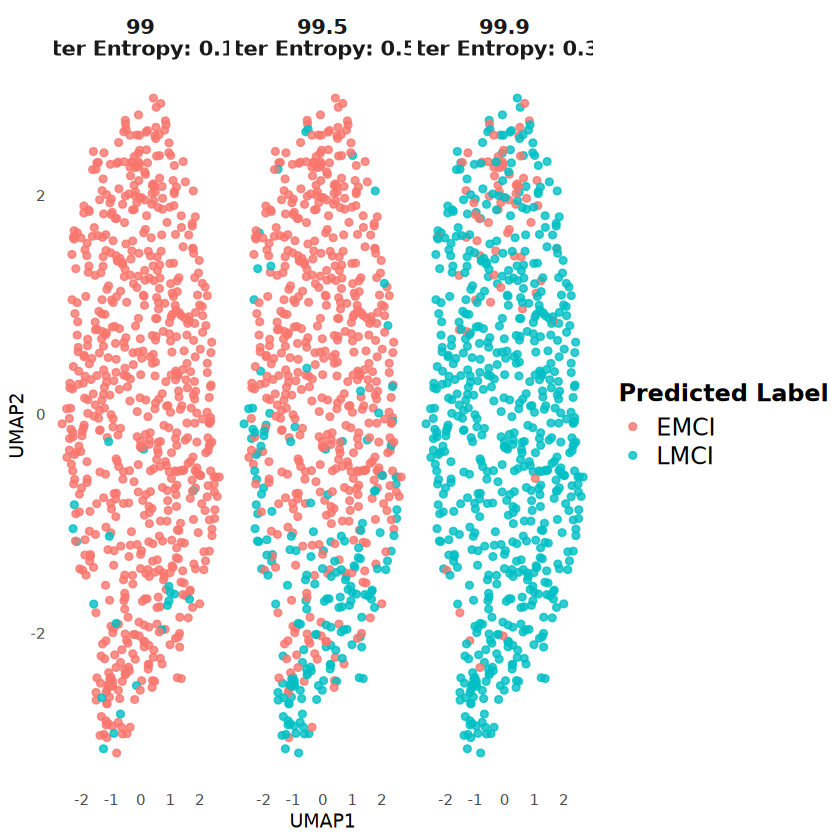

In [3]:
library(dplyr)
library(umap)
library(ggplot2)

run_umap <- function(file, type) {
  df <- read.csv(file)

  mat <- df %>% select(-labels_matching_UC_big, -X)
  u <- umap(mat)

  data.frame(
    UMAP1 = u$layout[,1],
    UMAP2 = u$layout[,2],
    Label = df$labels_matching_UC_big,
    Type  = type
  )
}

set.seed(123)

df_high   <- run_umap("999.csv",  "99.9\nCluster Entropy: 0.3198")
df_top    <- run_umap("99.5.csv","99.5\nCluster Entropy: 0.5650")
df_middle <- run_umap("99.csv",  "99\nCluster Entropy: 0.1323")

umap_all <- bind_rows(df_middle,df_top,df_high)

p_top3 = ggplot(umap_all, aes(UMAP1, UMAP2, color = Label)) +
  geom_point(size = 1.5, alpha = 0.8) +
  facet_wrap(~Type, ncol = 4) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    strip.text = element_text(size = 12, face = "bold"),
    legend.title = element_text(size = 14, face = "bold"),
    legend.text  = element_text(size = 14)
  ) +
  labs(
    #title = "Comparison of Label Transfer Results across Runs",
    color = "Predicted Label"
  )
p_top3


In [4]:
png('Similarity sensitivity.png',width=12,height=5,res=300,unit='in')
p_top3
dev.off()

png 
  2